In [1]:
from datetime import datetime
from utils import get_pg_engine
import pandas as pd
import numpy as np

In [2]:
engine = get_pg_engine()

In [3]:
corrs = pd.read_sql('select * from correlations_2019_11_01_2020_02_11_1000', engine)

In [4]:
corrs.shape

(72771, 5)

In [5]:
corrs[corrs['cor'] > 0.95].head(20)

,index,symbol1,symbol2,cor,id
872,16055,AFRK-LN,BLVN-LN,0.954782,2019_11_01_2020_02_11_1000
1052,17589,ALU-LN,BOTB-LN,0.959380,2019_11_01_2020_02_11_1000
1817,22967,BOU-LN,CGO-LN,1.000000,2019_11_01_2020_02_11_1000
2000,24113,BOU-LN,CLLN-LN,1.000000,2019_11_01_2020_02_11_1000
2013,24126,CGO-LN,CLLN-LN,1.000000,2019_11_01_2020_02_11_1000
2432,26757,ALU-LN,CPS-LN,0.967104,2019_11_01_2020_02_11_1000
3249,30951,AFM-LN,DFS-LN,0.956351,2019_11_01_2020_02_11_1000
3278,30980,BBY-LN,DFS-LN,0.951559,2019_11_01_2020_02_11_1000
3875,33663,BOU-LN,DVT-LN,1.000000,2019_11_01_2020_02_11_1000
3888,33676,CGO-LN,DVT-LN,1.000000,2019_11_01_2020_02_11_1000


In [6]:
price = pd.read_sql('select * from price \
    where \
     ("timestamp" between \'2019-01-01-\' and \'2020-01-19\')', engine)

In [19]:
price['close_s'] = price.groupby('symbol')['close'].apply(lambda x: (x-min(x))/(max(x)-min(x)))

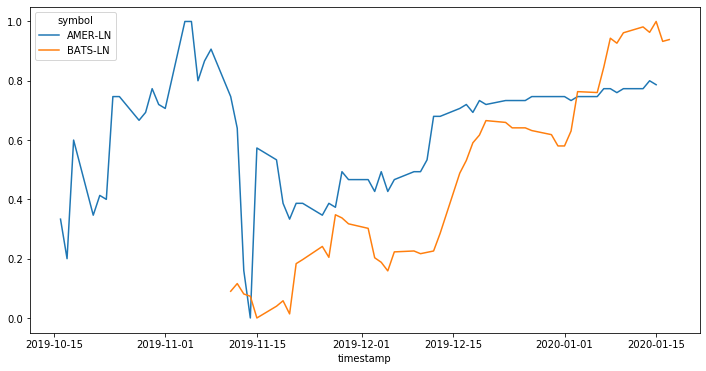

In [24]:
price[price['symbol'].isin(['BATS-LN','AMER-LN'])][['timestamp','close_s','symbol']].pivot(index = 'timestamp', values = 'close_s', columns='symbol')\
.plot(figsize=(12,6))

In [25]:
stdevs = price.groupby('symbol')['close'].apply(lambda x: np.std(x)/x.mean())

In [26]:
stdevs[stdevs>0].sort_values(ascending=False).head(25)

symbol
PERE-LN    0.816135
I3E-LN     0.531028
TLW-LN     0.475787
INSP-LN    0.364587
ORM-LN     0.301742
TOM-LN     0.300113
ALY-LN     0.293004
MNO-LN     0.285654
SOU-LN     0.285597
GRC-LN     0.267716
BLVN-LN    0.261710
IKA-LN     0.261163
LWRF-LN    0.229217
KOOV-LN    0.225138
STA-LN     0.221443
SENS-LN    0.211573
ZOL-LN     0.205979
MTMY-LN    0.204103
TXP-LN     0.204033
KAPE-LN    0.203115
PRD-LN     0.200733
SRO-LN     0.200081
TRP-LN     0.199587
IGP-LN     0.198887
EUZ-LN     0.193901
Name: close, dtype: float64

In [10]:
price[price['symbol'] == 'AAS.LON']['close']

Series([], Name: close, dtype: float64)